<a href="https://colab.research.google.com/github/AbrahamB2603/IAyRN/blob/Main/R%C3%A1pido2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Crea el dataset de entrenamiento y validación
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Guardamos las clases antes de aplicar cache y prefetch
class_names = train_ds.class_names

# Optimización del pipeline: cache y prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Clases detectadas:", class_names)


Found 2062 files belonging to 10 classes.
Using 1650 files for training.
Found 2062 files belonging to 10 classes.
Using 412 files for validation.
Clases detectadas: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Contenido de la carpeta Dataset: ['2', '9', '6', '0', '8', '3', '1', '4', '7', '5']
Found 2062 files belonging to 10 classes.
Using 1650 files for training.
Found 2062 files belonging to 10 classes.
Using 412 files for validation.
Clases detectadas: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,506 (14.14 MB)

 Trainable params: 3,706,506 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 50s 895ms/step - accuracy: 0.2068 - loss: 255.4310 - val_accuracy: 0.4830 - val_loss: 1.4066
Epoch 2/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 74s 754ms/step - accuracy: 0.5806 - loss: 1.2278 - val_accuracy: 0.6238 - val_loss: 1.5195
Epoch 3/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 789ms/step - accuracy: 0.8065 - loss: 0.6785 - val_accuracy: 0.6578 - val_loss: 1.1320
Epoch 4/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 790ms/step - accuracy: 0.9123 - loss: 0.3047 - val_accuracy: 0.5947 - val_loss: 1.3080
Epoch 5/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 42s 803ms/step - accuracy: 0.9257 - loss: 0.2908 - val_accuracy: 0.6699 - val_loss: 1.3188


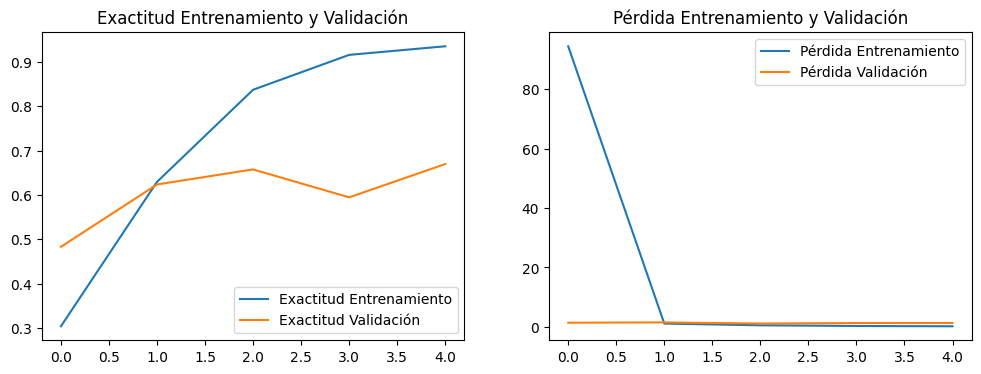

Error al abrir la webcam
Iniciando la webcam. Presiona 'q' para salir.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


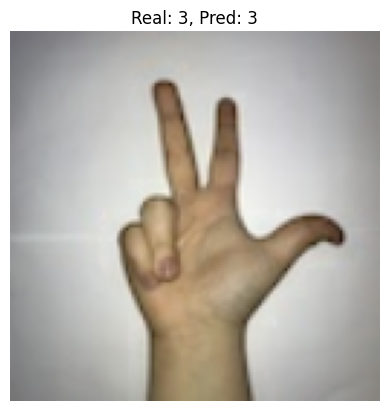

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


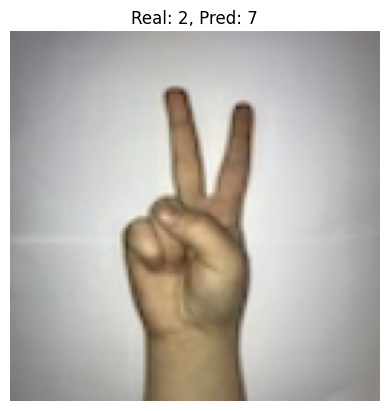

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


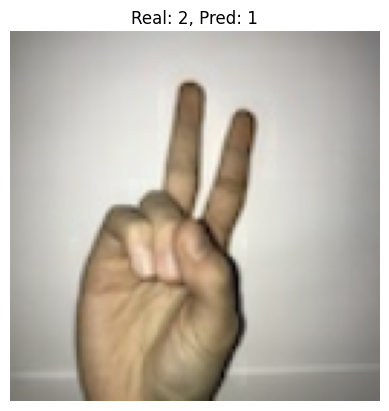

In [4]:
# ============================
# 1. Importar Librerías
# ============================
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

# ============================
# 2. Montar Google Drive y Preprocesamiento
# ============================
# Montamos Google Drive para acceder al dataset
drive.mount('/content/drive')

# Definimos la ruta al dataset en Drive.
# Se asume que tu dataset está organizado en:
# /content/drive/MyDrive/Datasets/Dataset/
# y que dentro existen subcarpetas (ej. 0, 1, 2, 3, 4, 5)
DATASET_PATH = "/content/drive/MyDrive/Datasets/Dataset"
print("Contenido de la carpeta Dataset:", os.listdir(DATASET_PATH))

# Parámetros de preprocesamiento
IMG_SIZE = (128, 128)  # Se reduce la resolución para acelerar el entrenamiento.
BATCH_SIZE = 32       # Batch size moderado

# Se crea el dataset de entrenamiento y validación usando una partición 80/20.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Guardamos las clases detectadas antes de aplicar optimizaciones
class_names = train_ds.class_names

# Optimización del pipeline: cache y prefetch para evitar cargas repetidas en memoria.
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Clases detectadas:", class_names)

# ============================
# 3. Estructura y Entrenamiento de la RNAC
# ============================
NUM_CLASSES = len(class_names)

# Arquitectura simplificada para acelerar el entrenamiento:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SIZE + (3,)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compilamos el modelo.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Entrenamiento del modelo (se reducen los epochs a 5 para acelerar)
EPOCHS = 5
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

# ============================
# 4. Resultados de Exactitud de la RNAC
# ============================
# Graficamos la evolución de precisión y pérdida para entrenamiento y validación.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Exactitud Entrenamiento')
plt.plot(epochs_range, val_acc, label='Exactitud Validación')
plt.legend(loc='lower right')
plt.title('Exactitud Entrenamiento y Validación')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Pérdida Entrenamiento')
plt.plot(epochs_range, val_loss, label='Pérdida Validación')
plt.legend(loc='upper right')
plt.title('Pérdida Entrenamiento y Validación')
plt.savefig("/content/training_validation_metrics.png")
plt.show()

# ============================
# 5. Predicciones con la RNAC y Uso de la Webcam
# ============================
def preprocess_frame(frame):
    # Redimensiona el frame al tamaño esperado (128x128).
    frame_resized = cv2.resize(frame, IMG_SIZE)
    # Cambia el color de BGR a RGB.
    frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)
    # Expande dimensiones para que el modelo lo procese (1, height, width, channels).
    frame_expanded = np.expand_dims(frame_rgb, axis=0)
    return frame_expanded

# Iniciar la captura de video de la webcam.
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error al abrir la webcam")

print("Iniciando la webcam. Presiona 'q' para salir.")
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocesa el frame y realiza la predicción.
    frame_preprocessed = preprocess_frame(frame)
    predictions = model.predict(frame_preprocessed)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])

    # Inserta la predicción en el frame.
    cv2.putText(frame, f"Pred: {predicted_class} ({confidence*100:.1f}%)", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    cv2.imshow("Predicciones en Tiempo Real", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# ============================
# 6. Ejemplo de Predicciones con Imágenes de Validación
# ============================
# Extraemos 3 imágenes de validación, realizamos predicciones y mostramos la etiqueta real junto a la predicción.
for images, labels in val_ds.take(1):
    for i in range(min(3, images.shape[0])):
        image = images[i].numpy().astype("uint8")
        actual_label = labels[i].numpy()
        image_expanded = np.expand_dims(image, axis=0)
        prediction = model.predict(image_expanded)
        predicted_label = np.argmax(prediction[0])

        plt.figure()
        plt.imshow(image)
        plt.title(f"Real: {class_names[actual_label]}, Pred: {class_names[predicted_label]}")
        plt.axis('off')
        plt.show()
